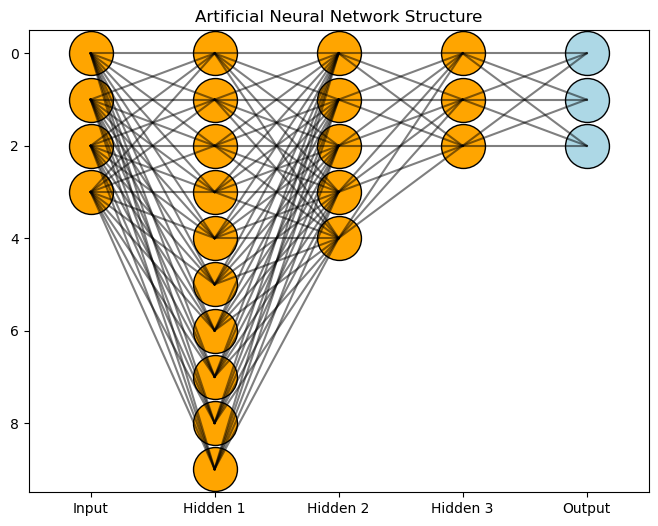

K-NN Accuracy: 0.91
Weighted K-NN Accuracy: 0.91
Enhanced ANN Accuracy: 0.93


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Function to plot the ANN structure
def plot_ann_structure(model, input_shape):
    layers = [input_shape] + [layer.shape[1] for layer in model.coefs_] + [model.n_outputs_]
    plt.figure(figsize=(8, 6))
    
    for layer_idx in range(len(layers) - 1):
        for neuron_idx in range(layers[layer_idx]):
            for next_neuron_idx in range(layers[layer_idx + 1]):
                plt.plot(
                    [layer_idx, layer_idx + 1],
                    [neuron_idx, next_neuron_idx],
                    'k-', alpha=0.5
                )
    
    # Adding neurons as circles
    for layer_idx in range(len(layers)):
        for neuron_idx in range(layers[layer_idx]):
            plt.scatter(
                [layer_idx], [neuron_idx],
                s=1000,
                edgecolor='black',
                facecolor='orange' if layer_idx < len(layers) - 1 else 'lightblue'
            )
    
    plt.xlim(-0.5, len(layers) - 0.5)
    plt.ylim(-0.5, max(layers) - 0.5)
    plt.xticks(
        range(len(layers)),
        ['Input'] + [f'Hidden {i + 1}' for i in range(len(layers) - 2)] + ['Output']
    )
    plt.title('Artificial Neural Network Structure')
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.show()

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Introduce noise to the features
noise = np.random.normal(0, 0.5, X.shape)
X_noisy = X + noise

# Normalize the features
scaler = StandardScaler()
X_noisy_scaled = scaler.fit_transform(X_noisy)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_noisy_scaled, y, test_size=0.3, random_state=42)

# K-NN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Weighted K-NN Classifier
weighted_knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
weighted_knn.fit(X_train, y_train)
y_pred_weighted_knn = weighted_knn.predict(X_test)
accuracy_weighted_knn = accuracy_score(y_test, y_pred_weighted_knn)

# Enhanced ANN with Backpropagation
ann = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', max_iter=2000, random_state=42)
ann.fit(X_train, y_train)

# Plot the ANN structure
plot_ann_structure(ann, X_train.shape[1])

# ANN Accuracy
y_pred_ann = ann.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_pred_ann)

# Print accuracies
print(f"K-NN Accuracy: {accuracy_knn:.2f}")
print(f"Weighted K-NN Accuracy: {accuracy_weighted_knn:.2f}")
print(f"Enhanced ANN Accuracy: {accuracy_ann:.2f}")
